In [ ]:
from pandas.io import gbq

In [ ]:
query = """

"""

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

# 1. data import

In [5]:
data = pd.read_csv('./data/ga.csv')

In [6]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [10]:
sample = data.iloc[0]['device']  # json type

In [11]:
sample

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Linux", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [8]:
data.info()    # json type이지만 string으로 인식

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channelGrouping       11515 non-null  object 
 1   date                  11515 non-null  int64  
 2   device                11515 non-null  object 
 3   fullVisitorId         11515 non-null  float64
 4   geoNetwork            11515 non-null  object 
 5   sessionId             11515 non-null  object 
 6   socialEngagementType  11515 non-null  object 
 7   totals                11515 non-null  object 
 8   trafficSource         11515 non-null  object 
 9   visitId               11515 non-null  int64  
 10  visitNumber           11515 non-null  int64  
 11  visitStartTime        11515 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


+ json format 다루기

In [12]:
json.loads(sample) # 한 번에 한줄씩 처리

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [14]:
data['device'].apply(lambda x: json.loads(x))  # 각각의 줄 처리하기

0        {'browser': 'Chrome', 'browserVersion': 'not a...
1        {'browser': 'Chrome', 'browserVersion': 'not a...
2        {'browser': 'Chrome', 'browserVersion': 'not a...
3        {'browser': 'Chrome', 'browserVersion': 'not a...
4        {'browser': 'Chrome', 'browserVersion': 'not a...
                               ...                        
11510    {'browser': 'Chrome', 'browserVersion': 'not a...
11511    {'browser': 'Chrome', 'browserVersion': 'not a...
11512    {'browser': 'Chrome', 'browserVersion': 'not a...
11513    {'browser': 'Firefox', 'browserVersion': 'not ...
11514    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 11515, dtype: object

In [15]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [16]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']  # json type columns

In [17]:
data = pd.read_csv('./data/ga.csv', converters = {column: json.loads for column in json_columns})

In [19]:
data.iloc[0]['device']  # 바로 json type으로 불러와짐

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [24]:
device = json_normalize(data['device'])
geoNetwork = json_normalize(data['geoNetwork'])
totals = json_normalize(data['totals'])
trafficSource = json_normalize(data['trafficSource'])

c:\users\minky\anaconda3\envs\minky\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
c:\users\minky\anaconda3\envs\minky\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
c:\users\minky\anaconda3\envs\minky\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\minky\anaconda3\envs\minky\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [25]:
# device.columns = ['device.brower', 'device.browerVersion']

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...
11510,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11511,Americas,Northern America,United States,Texas,Austin TX,Austin,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11512,Asia,Eastern Asia,South Korea,Seoul,(not set),Seoul,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
11513,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,optonline.net,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [26]:
{i for i in device.columns}

{'browser',
 'browserSize',
 'browserVersion',
 'deviceCategory',
 'flashVersion',
 'isMobile',
 'language',
 'mobileDeviceBranding',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'mobileDeviceModel',
 'mobileInputSelector',
 'operatingSystem',
 'operatingSystemVersion',
 'screenColors',
 'screenResolution'}

In [27]:
f"{'hi'}_{'bye'}"

'hi_bye'

In [34]:
device.columns = [f"{'device.'}_{i}" for i in device.columns]  # 한번에 column명 바꾸기

In [33]:
device.head()

,device._browser,device._browserVersion,device._browserSize,device._operatingSystem,device._operatingSystemVersion,device._isMobile,device._mobileDeviceBranding,device._mobileDeviceModel,device._mobileInputSelector,device._mobileDeviceInfo,device._mobileDeviceMarketingName,device._flashVersion,device._language,device._screenColors,device._screenResolution,device._deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [36]:
geoNetwork .columns = [f"{'geoNetwork .'}_{i}" for i in geoNetwork.columns]
totals.columns = [f"{'totals.'}_{i}" for i in totals.columns]
trafficSource.columns = [f"{'trafficSource.'}_{i}" for i in trafficSource.columns]

+ 데이터 합치기

In [39]:
pd.concat([data, device, geoNetwork, totals, trafficSource], axis = 1).drop(json_columns, axis = 1)  # column으로 붙이고 중복열 지우기

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device._device._browser,device._device._browserVersion,...,trafficSource._isTrueDirect,trafficSource._adwordsClickInfo.criteriaParameters,trafficSource._keyword,trafficSource._referralPath,trafficSource._adContent,trafficSource._adwordsClickInfo.page,trafficSource._adwordsClickInfo.slot,trafficSource._adwordsClickInfo.gclId,trafficSource._adwordsClickInfo.adNetworkType,trafficSource._adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,6.849600e+18,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11511,Referral,20170104,2.119870e+17,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11512,Referral,20170104,9.981560e+18,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11513,Direct,20170104,9.631260e+17,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


+ 한번에 처리하기

In [41]:
for i in json_columns:
    json_df = json_normalize(data[i])  # json type normalize
    json_df.columns = [f"{i}.{j}" for j in json_df.columns]  # column명 update
    data = pd.concat([data.drop(i, axis = 1), json_df], axis = 1)  # json type 겹치는거 drop & 데이터 합치기

c:\users\minky\anaconda3\envs\minky\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [42]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN


## 2. data analyzing

In [45]:
pd.set_option('display.max_columns', 100)  # column 최대 100개 프린트

In [44]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [47]:
data.isnull().sum()

channelGrouping                                          0
date                                                     0
fullVisitorId                                            0
sessionId                                                0
socialEngagementType                                     0
visitId                                                  0
visitNumber                                              0
visitStartTime                                           0
device.browser                                           0
device.browserVersion                                    0
device.browserSize                                       0
device.operatingSystem                                   0
device.operatingSystemVersion                            0
device.isMobile                                          0
device.mobileDeviceBranding                              0
device.mobileDeviceModel                                 0
device.mobileInputSelector                              

+ total column을 numeric type으로 바꾸기

In [48]:
totals = ['totals.visits', 'totals.hits', 'totals.pageviews', 'totals.transactionRevenue', 'totals.newVisits']

In [49]:
for i in totals:
    data[i] = pd.to_numeric(data[i])

In [50]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availabl

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [52]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits
count,1.151500e+04,1.151500e+04,1.151500e+04,11515.000000,1.151500e+04,11515.0,11515.000000,11515.000000,1.151500e+04,4465.0
mean,2.016622e+07,4.503303e+18,1.485876e+09,4.083196,1.485876e+09,1.0,36.274251,28.330439,1.337448e+08,1.0
std,4.687452e+03,3.062080e+18,9.308961e+06,12.508556,9.308963e+06,0.0,30.269294,21.727555,4.482852e+08,0.0
min,2.016080e+07,2.131310e+14,1.470046e+09,1.000000,1.470046e+09,1.0,2.000000,2.000000,1.000000e+04,1.0
25%,2.016110e+07,1.639590e+18,1.478054e+09,1.000000,1.478054e+09,1.0,19.000000,16.000000,2.493000e+07,1.0
50%,2.017013e+07,4.377180e+18,1.485554e+09,2.000000,1.485554e+09,1.0,28.000000,23.000000,4.945000e+07,1.0
75%,2.017050e+07,7.184570e+18,1.493948e+09,4.000000,1.493948e+09,1.0,44.000000,34.000000,1.076550e+08,1.0
max,2.017080e+07,9.999000e+18,1.501652e+09,315.000000,1.501652e+09,1.0,500.000000,469.000000,2.312950e+10,1.0


In [53]:
1.000000e+04

10000.0

<AxesSubplot:xlabel='totals.transactionRevenue'>

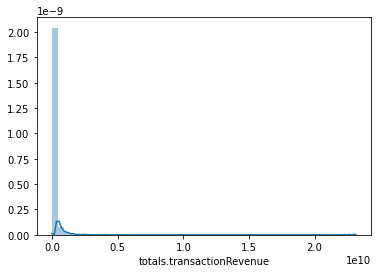

In [55]:
sns.distplot(data['totals.transactionRevenue'])

<AxesSubplot:xlabel='totals.transactionRevenue'>

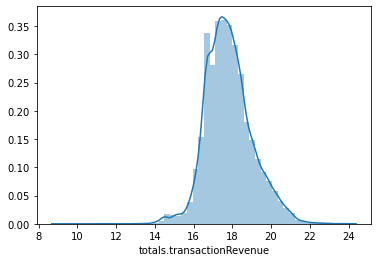

In [56]:
sns.distplot(np.log(data['totals.transactionRevenue']))  # totals.transactionRevenue의 값이 급하게 상승하기떄문에 로그를 취해줌

In [57]:
data['totals.transactionRevenue'] = np.log(data['totals.transactionRevenue'])

In [58]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

In [59]:
drop_list = ['fullVisitorId', 'sessionId', 'visitId', 'visitStartTime']  # drop list

In [61]:
data.drop(drop_list, axis = 1, inplace = True)  # drop list 한번에 drop

KeyError: "['fullVisitorId' 'sessionId' 'visitId' 'visitStartTime'] not found in axis"

In [62]:
data.head()

,channelGrouping,date,socialEngagementType,visitNumber,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo da

In [65]:
data.isnull().mean()  # 90%이상인 경우 drop

channelGrouping                                      0.000000
date                                                 0.000000
socialEngagementType                                 0.000000
visitNumber                                          0.000000
device.browser                                       0.000000
device.browserVersion                                0.000000
device.browserSize                                   0.000000
device.operatingSystem                               0.000000
device.operatingSystemVersion                        0.000000
device.isMobile                                      0.000000
device.mobileDeviceBranding                          0.000000
device.mobileDeviceModel                             0.000000
device.mobileInputSelector                           0.000000
device.mobileDeviceInfo                              0.000000
device.mobileDeviceMarketingName                     0.000000
device.flashVersion                                  0.000000
device.l

In [67]:
na_list = data.isnull().mean()[data.isnull().mean() > 0.9].index  # 90%이상 na인 column명

In [68]:
data.drop(na_list, axis = 1, inplace = True)

In [69]:
data.isnull().mean()

channelGrouping                                      0.000000
date                                                 0.000000
socialEngagementType                                 0.000000
visitNumber                                          0.000000
device.browser                                       0.000000
device.browserVersion                                0.000000
device.browserSize                                   0.000000
device.operatingSystem                               0.000000
device.operatingSystemVersion                        0.000000
device.isMobile                                      0.000000
device.mobileDeviceBranding                          0.000000
device.mobileDeviceModel                             0.000000
device.mobileInputSelector                           0.000000
device.mobileDeviceInfo                              0.000000
device.mobileDeviceMarketingName                     0.000000
device.flashVersion                                  0.000000
device.l

In [70]:
data.isnull().mean()[data.isnull().mean() > 0].index

Index(['totals.newVisits', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.referralPath'],
      dtype='object')

In [71]:
data['totals.newVisits'].value_counts()  # 범주가 1개이기때문에 drop

1.0    4465
Name: totals.newVisits, dtype: int64

In [72]:
data.drop('totals.newVisits', axis = 1, inplace = True)

In [73]:
data['trafficSource.isTrueDirect'].value_counts()  # 범주가 1개이기때문에 drop

True    7004
Name: trafficSource.isTrueDirect, dtype: int64

In [74]:
data.drop('trafficSource.isTrueDirect', axis = 1, inplace = True)

In [75]:
data['trafficSource.keyword'].value_counts()  # 범주가 1개이기때문에 drop

(not provided)                             3387
6qEhsCssdK0z36ri                            261
google merchandise store                     59
1hZbAqLCbjwfgOH7                             56
Google Merchandise                           45
(Remarketing/Content targeting)               9
+Google +Merchandise                          7
1X4Me6ZKNV0zg-jV                              6
+Google +Gear                                 3
+Google +Swag                                 3
google store                                  3
+google +store                                2
GOOGLE MERCHANDISE                            2
youtube merch                                 2
+google +merchandise +store                   2
google stickers                               2
category_l1==166                              2
google apparel store                          2
google store merchandise                      2
+google +coffee +mug                          1
google items for sale                   

In [82]:
data['trafficSource.keyword'] = data['trafficSource.keyword'].fillna('unknown')  # na를 unknown으로 채우기

In [78]:
data['trafficSource.referralPath'].value_counts()  # 유용한 정보가 아니므로 drop

/                                                                                                                                                                                  5151
/mail/u/0/                                                                                                                                                                           55
/a/google.com/forum/                                                                                                                                                                 35
/google-merchandise-store                                                                                                                                                            22
/offer/2145                                                                                                                                                                          18
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179     

In [79]:
data.drop('trafficSource.referralPath', axis = 1, inplace = True)

In [83]:
data.isnull().mean()

channelGrouping                                      0.0
date                                                 0.0
socialEngagementType                                 0.0
visitNumber                                          0.0
device.browser                                       0.0
device.browserVersion                                0.0
device.browserSize                                   0.0
device.operatingSystem                               0.0
device.operatingSystemVersion                        0.0
device.isMobile                                      0.0
device.mobileDeviceBranding                          0.0
device.mobileDeviceModel                             0.0
device.mobileInputSelector                           0.0
device.mobileDeviceInfo                              0.0
device.mobileDeviceMarketingName                     0.0
device.flashVersion                                  0.0
device.language                                      0.0
device.screenColors            

+ 범주형 데이터 dummy만들기

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   socialEngagementType                               11515 non-null  object 
 3   visitNumber                                        11515 non-null  int64  
 4   device.browser                                     11515 non-null  object 
 5   device.browserVersion                              11515 non-null  object 
 6   device.browserSize                                 11515 non-null  object 
 7   device.operatingSystem                             11515 non-null  object 
 8   device.operatingSystemVersion                      11515 non-null  object 
 9   device

In [85]:
data['trafficSource.campaign'].dtype

dtype('O')

In [89]:
# object type인 경우 범주갯수 출력
for i in data.columns:
    if data[i].dtype == 'O':
        print(i, data[i].nunique())

channelGrouping 8
socialEngagementType 1
device.browser 9
device.browserVersion 1
device.browserSize 1
device.operatingSystem 7
device.operatingSystemVersion 1
device.mobileDeviceBranding 1
device.mobileDeviceModel 1
device.mobileInputSelector 1
device.mobileDeviceInfo 1
device.mobileDeviceMarketingName 1
device.flashVersion 1
device.language 1
device.screenColors 1
device.screenResolution 1
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.region 79
geoNetwork.metro 46
geoNetwork.city 134
geoNetwork.cityId 1
geoNetwork.networkDomain 732
geoNetwork.latitude 1
geoNetwork.longitude 1
geoNetwork.networkLocation 1
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.adwordsClickInfo.criteriaParameters 1
trafficSource.keyword 36


+ DataFrame으로 바꾸기

In [90]:
count = pd.DataFrame(columns = ['count'])
for i in data.columns:
    if data[i].dtype == 'O':
        count.loc[i] = data[i].nunique()

In [91]:
count

,count
channelGrouping,8
socialEngagementType,1
device.browser,9
device.browserVersion,1
device.browserSize,1
device.operatingSystem,7
device.operatingSystemVersion,1
device.mobileDeviceBranding,1
device.mobileDeviceModel,1
device.mobileInputSelector,1


In [94]:
value_one = count[count['count'] == 1].index  # count가 1개인 경우 drop

In [95]:
data.drop(value_one, axis = 1, inplace = True)

In [96]:
value_large = count[count['count'] > 70].index  # count가 70개 이상인 경우 drop

In [97]:
data.drop(value_large, axis = 1, inplace = True)

In [98]:
data.head()

,channelGrouping,date,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.metro,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword
0,Direct,20160902,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,Detroit MI,1,11,11,17.449406,(not set),(direct),(none),unknown
1,Organic Search,20160902,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,11,10,19.541283,(not set),google,organic,(not provided)
2,Referral,20160902,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York NY,1,13,11,18.035459,(not set),mall.googleplex.com,referral,unknown
3,Referral,20160902,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,San Francisco-Oakland-San Jose CA,1,13,12,17.083177,(not set),mall.googleplex.com,referral,unknown
4,Referral,20160902,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,1,17,14,20.168401,(not set),mall.googleplex.com,referral,unknown


+ get dummies

In [99]:
obj_list = []

for i in data.columns:
    if data[i].dtype == 'O':
        obj_list.append(i)  # object type의 column의 이름만 저장

In [111]:
data = pd.get_dummies(data, columns = obj_list, drop_first = True)  # object type의 columns를 dummies

## 3. Data modeling

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            11515 non-null  object 
 1   date                       11515 non-null  int64  
 2   visitNumber                11515 non-null  int64  
 3   device.browser             11515 non-null  object 
 4   device.operatingSystem     11515 non-null  object 
 5   device.isMobile            11515 non-null  bool   
 6   device.deviceCategory      11515 non-null  object 
 7   geoNetwork.continent       11515 non-null  object 
 8   geoNetwork.subContinent    11515 non-null  object 
 9   geoNetwork.country         11515 non-null  object 
 10  geoNetwork.metro           11515 non-null  object 
 11  totals.visits              11515 non-null  int64  
 12  totals.hits                11515 non-null  int64  
 13  totals.pageviews           11515 non-null  int

In [112]:
X = data.drop('totals.transactionRevenue', axis = 1)
y = data['totals.transactionRevenue']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

+ RandomForset modeling

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
model = RandomForestRegressor(max_depth = 10, n_estimators = 1000)

In [114]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [119]:
pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
mean_squared_error(pred, y_test) # MSE

1.1084032304127165

In [118]:
mean_squared_error(pred, y_test) ** 0.5  # RMSE

1.0528073092511832

<AxesSubplot:xlabel='totals.transactionRevenue'>

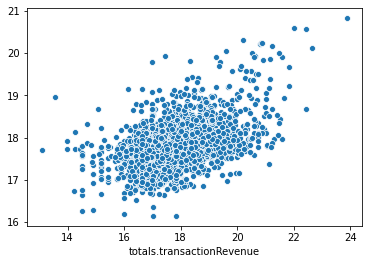

In [120]:
sns.scatterplot(y_test, pred)  #선형관계